[('000001', '2016-03-10', '2016-03-21', 8, 6), ('000002', '2014-07-17', '2014-07-29', 9, 16), ('000004', '2014-06-19', '2014-07-08', 14, 10), ('000005', '2014-12-24', '2015-05-29', 18, 298), ('000006', '2013-07-29', '2013-08-21', 18, 17), ('000007', '2013-05-08', '2013-05-21', 10, 13), ('000008', '2014-06-19', '2014-09-30', 12, 98), ('000009', '2015-09-29', '2015-10-20', 12, 34), ('000010', '2014-12-22', '2015-05-29', 13, 145), ('000011', '2014-12-22', '2015-01-05', 9, 10), ('000012', '2015-03-12', '2015-04-30', 11, 53), ('000014', '2015-05-29', '2015-06-10', 9, 59), ('000016', '2013-07-19', '2013-07-29', 7, 16), ('000017', '2014-08-26', '2014-09-05', 9, 15), ('000018', '2013-07-30', '2013-08-12', 10, 12), ('000019', '2016-01-27', '2016-02-16', 10, 110), ('000020', '2013-05-08', '2013-05-21', 10, 8), ('000021', '2015-02-11', '2015-03-02', 10, 13), ('000022', '2014-12-01', '2014-12-11', 9, 42), ('000023', '2014-07-23', '2014-08-04', 9, 9), ('000025', '2014-01-20', '2014-02-11', 12, 22),

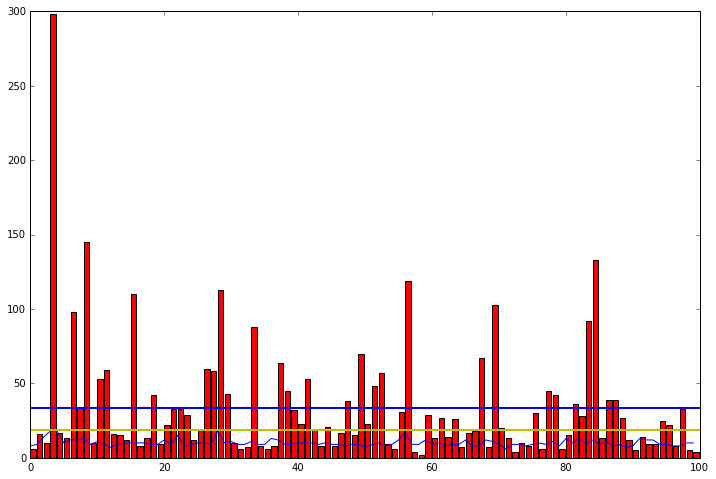

In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import unittest
import glob, os
import csv
import re
import argparse
import matplotlib.pyplot as plt

DATA_FILE_PATH_WIN = 'D:/analytics/stock/hist'
TEST_DATA_FILE_PATH = 'D:/analytics/stock/hist/002415.csv'

def process_file(f):
    lines = f.split('\n')
    dict = {}
    # loop thru lines and take date and closing price from each
    for l in lines[1:]:
        fields = l.split(',')
        if len(fields) >= 4:
            dict[fields[0]] = float(fields[3])
    s = pd.Series(dict)
    lis = find_lis(s)
    period_length = lis[0]
    starting_date, starting_price = s.index[lis[1]], s.ix[lis[1]]
    ending_date, ending_price = s.index[lis[1] + lis[0] - 1], s.ix[lis[1] + lis[0] - 1]
    variation_percentage = int((ending_price / starting_price - 1.) * 100)
    return starting_date, ending_date, period_length, variation_percentage

'''
find LIS (longest-increasing-subsequence) from one stock's history data
result is returned in form of (period_length, starting_position)
 '''
def find_lis(s):
    # files = sc.wholeTextFiles(DATA_FILE_PATH, use_unicode=False)
    lis = (1, 0)    # tuple for LIS found so far in form of (period_length, starting_position)
    start = 0   # starting position of the increasing subsequence evaluated currently
    while start < len(s) - lis[0]:
        last = start # last element added to the current subsequence
        for i in range(start+1, len(s)):
            if s.ix[i] >= s.ix[last]:
                last = i
            else:
                l = last - start + 1
                if l > lis[0]:
                    lis = (l, start)
                start = i
                break
        if last == len(s) - 1 and (last - start + 1) > lis[0]:
            lis = (last - start + 1, start)
            break
    return lis


class UnitTest(unittest.TestCase):

    def test_find_lis(self):
        s = pd.Series([1, 3, 9, 5, 4, 2, 6, 7, 8])
        self.assertTupleEqual(find_lis(s), (4, 5))


# test single file on Win platform
def testWithSingleFile(path):
    with open(TEST_DATA_FILE_PATH, 'r') as f:
        lis = process_file(f.read())
        print(lis)


def analyze_stocks(path, maximum=0):
    p = re.compile(r'\d{6}\.csv$')
    files = [f for f in glob.glob(path + '/*.csv') if p.search(f)]
    counter = 0
    maximum = maximum if maximum else 10000
    res = []
    
    for f in files:
        if counter == maximum:
            break;

#         print('analyzing ', f)
        try:
            with open(f, 'r') as file:
                res.append((f[-10:-4],) + process_file(file.read()))
        except:
            print('error analyzing ', f)
        else:
#             print('done with ', f)
            pass
        finally:
            counter+=1
            
    return res

    
def plot(seq):
    increase_percentage = [x[4] for x in seq if x is not None]
    period_length = [x[3] for x in seq if x is not None]
    x = np.arange(len(increase_percentage))
    plt.bar(x, increase_percentage, color='r')
    plt.plot(x, period_length, 'b')
    f = plt.gcf()
    default_size = f.get_size_inches()
    f.set_size_inches(default_size[0] * 2, default_size[1] * 2)
    s = pd.Series(increase_percentage)
    mean = s.mean()
    median = s.median()
    plt.axhline(y=mean, linewidth=2)
    plt.axhline(y=median, linewidth=2, color='y')
    
    
    plt.show()
    

if __name__ == '__main__':
    #unittest.main()
    #testWithSingleFile(TEST_DATA_FILE_PATH)

#     parser = argparse.ArgumentParser(description='Process stock history data.')
#     parser.add_argument('-m', '--max', help='Maximum number of stocks to be processed.',
#                         type=int, default=0)
#     args = parser.parse_args()

    res = analyze_stocks(DATA_FILE_PATH_WIN, 100)
    print(res)
    plot(res)